# Wikipedia Vote Network Analysis

The dataset for the analysis is available to download from: https://snap.stanford.edu/data/wiki-Vote.html or can be accessed from: https://universityofexeteruk-my.sharepoint.com/:u:/g/personal/sp915_exeter_ac_uk/Ebe-xEWxNGRNsm9Ix_JTNHgB2rtVesnDpiGZWVqGYmCo1A?e=yhomNa

### Importing necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import matplotlib.cm as cm

### Importing the csv from the zipped file

In [2]:
wiki = pd.read_csv("wiki-Vote.txt.gz",compression="gzip" ,
                   sep="\t",names=["Voter","Nominee"], skiprows=4)

In [3]:
wiki

,Voter,Nominee
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [4]:
#Converting to a network graph
G = nx.from_pandas_edgelist(wiki, "Voter", "Nominee")

#### Visualizing the graph

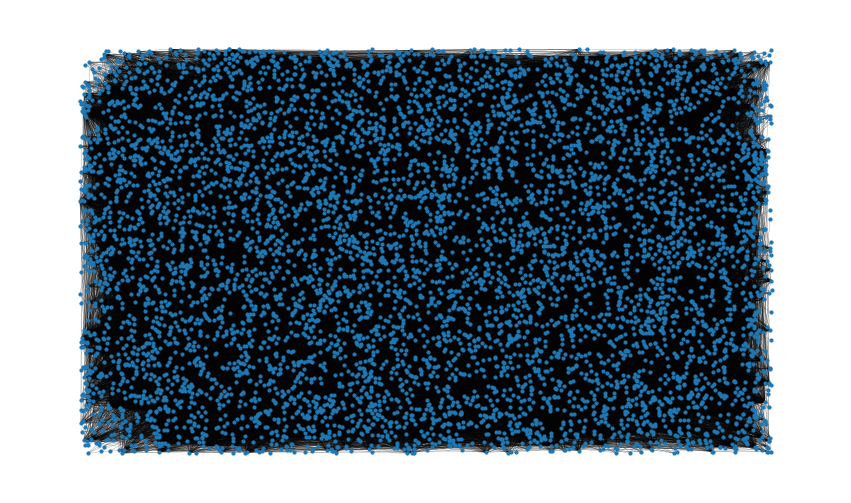

In [5]:
# Rough visualisation of the network
fig, ax = plt.subplots(figsize=(15,9))
ax.axis("off")
plot_options = {"node_size":10, "with_labels":False, "width": 0.15 }
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

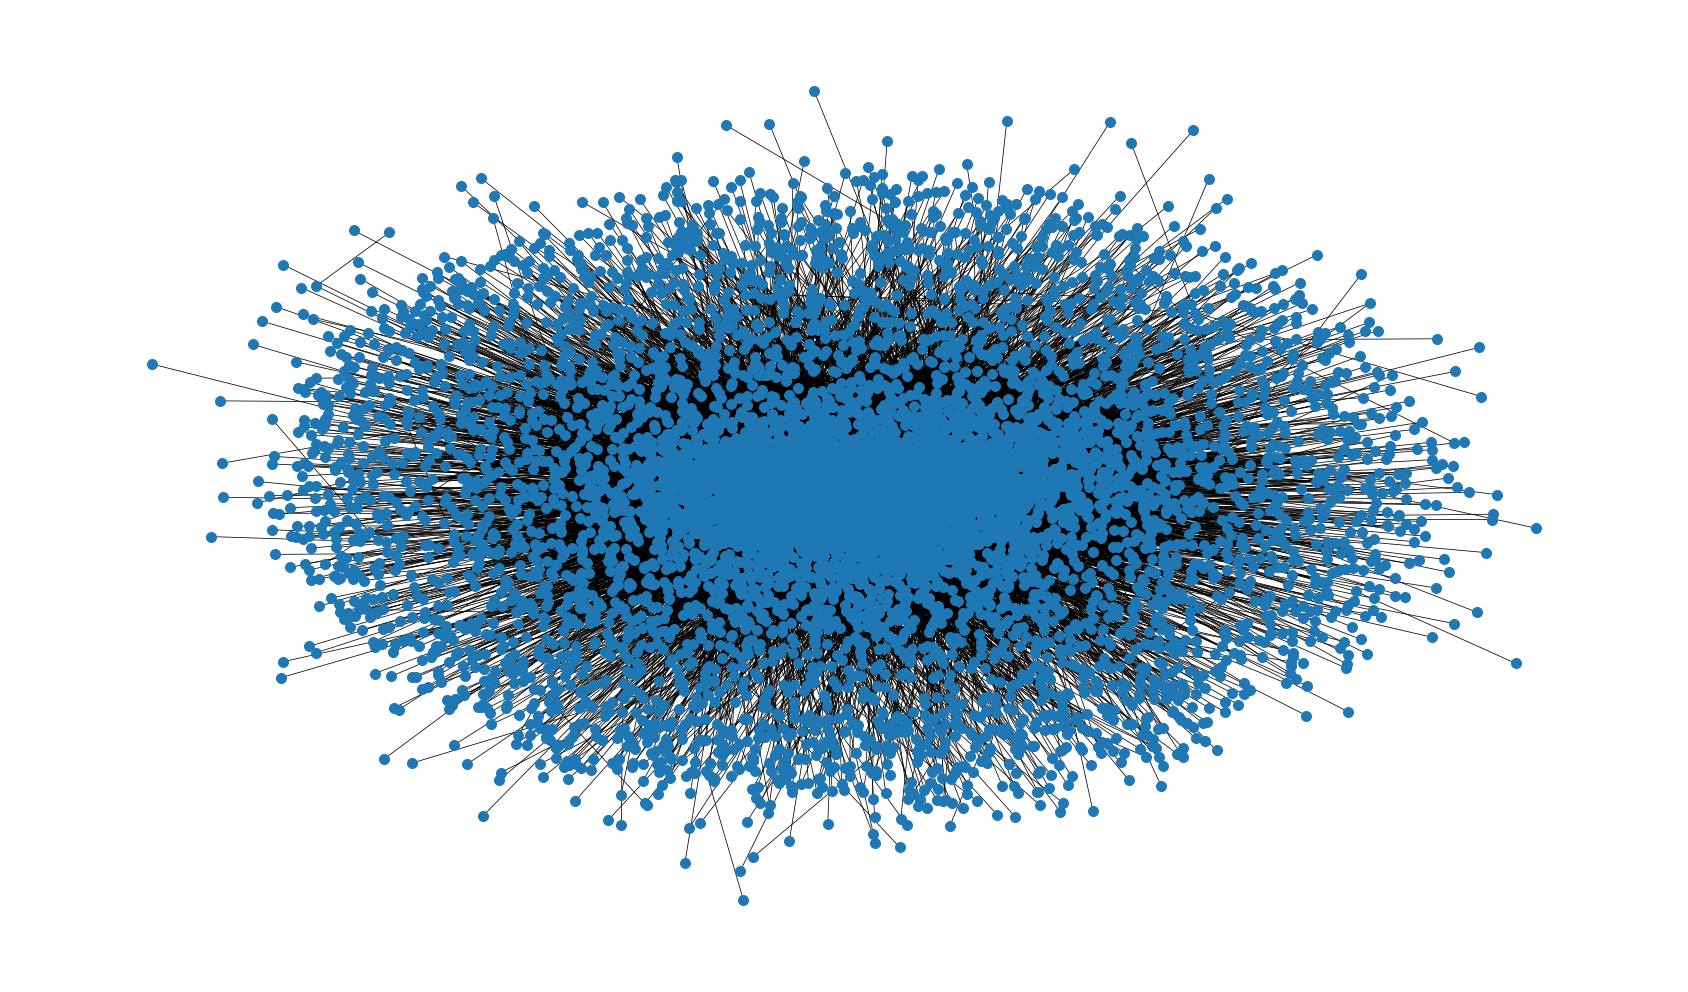

In [6]:
# Implementation of spring layout on the Giant Connected Component(GCC)
pos = nx.spring_layout(G, k=0.10)
fig, ax = plt.subplots(figsize=(30,18))
ax.axis("off")
# Subsetting the GCC
gcc = max(nx.connected_components(G), key=lambda x:len(x))
GCC = G.subgraph(gcc)
plot_options = {"node_size":100, "with_labels":False, "width": 0.75 }
#Plotting the Giant Component
nx.draw_networkx(GCC, pos=pos, ax=ax,**plot_options)
plt.savefig("gcc.pdf")

### Basic Topological attributes

In [7]:
#Number of nodes
G.number_of_nodes()

7115

In [8]:
#Number of edges
G.number_of_edges()

100762

In [9]:
#Average Degree of a node
np.mean([d for _, d in G.degree()])

28.32382290934645

* A node has an average of 28 neighbors in the network.
* Also known as the average degree of a node.

#### Shortest path for all pairs of nodes

In [10]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [11]:
# Computing the diameter of the Giant Component
diameter = max(nx.eccentricity(GCC, sp=shortest_path_lengths).values())
diameter

7

In [12]:
#Average shortest path length for every node
average_path_lengths = [np.mean(list(sp.values())) 
                        for sp in shortest_path_lengths.values()]

# Avergae path length of all nodes
np.mean(average_path_lengths)

3.2286237640127946

* In order to reach from one node to another, approximately 3.2 edges will be traversed on average. 


In [13]:
# Density of the network
nx.density(G)

0.003981420144693063

The density signifies the network is a sparse one.

In [14]:
# Total connected components in the network
nx.number_connected_components(G)

24

## Centrality Measures

### Degree Centrality

In [15]:
# Top 10 nodes with highest degree centralities
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(2565, 0.1497048074219848),
 (766, 0.10865898228844531),
 (11, 0.10444194545965702),
 (1549, 0.10402024177677818),
 (457, 0.10289569862243464),
 (1166, 0.09671071127354512),
 (2688, 0.08687095867303908),
 (1374, 0.07492268765813888),
 (1151, 0.07267360134945178),
 (5524, 0.06958110767500703)]

* 2565 is the node with highest degree centrality among all nodes.
* About 15% of the total voters have voted for this nominee
* Nodes 766,11,1549 and 457 also each shared votes with about 10% of the total voters. 

In [16]:
#Number of neighbors for the top 10 nodes with highest degree centralities
(sorted(G.degree, key=lambda item:item[1], reverse=True))[:10]

[(2565, 1065),
 (766, 773),
 (11, 743),
 (1549, 740),
 (457, 732),
 (1166, 688),
 (2688, 618),
 (1374, 533),
 (1151, 517),
 (5524, 495)]

Node **2565** has received the most votes from about 1065 voters. Nodes **766, 11, 1549 and 457** all recieved upwards of 700 votes. 

### Distribution of degree centralities

Text(0, 0.5, 'Counts')

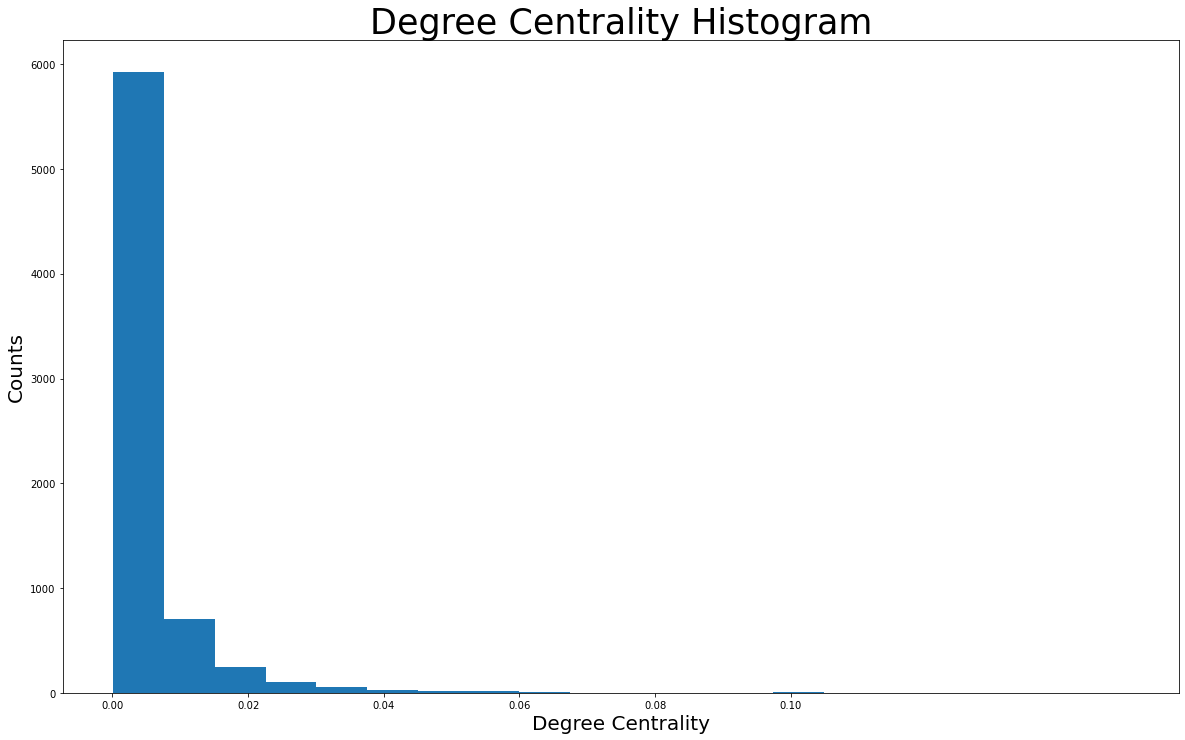

In [17]:
plt.figure(figsize=(20,12))
plt.hist(degree_centrality.values(), bins=20)
plt.xticks(ticks=[0, 0.02, 0.04,0.06,0.08,0.10])
plt.title("Degree Centrality Histogram", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size":20})
plt.ylabel("Counts", fontdict={"size":20})

(-1.1240689250826836,
 1.1692695710062981,
 -1.1789572566747666,
 1.2070502370595932)

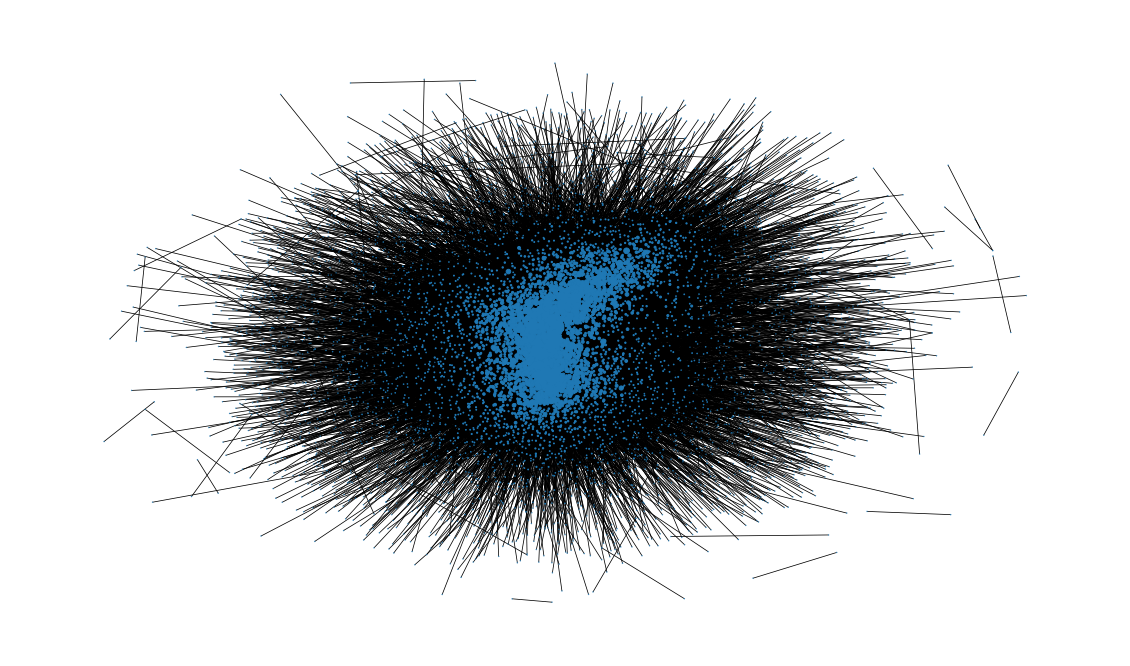

In [18]:
#Checking the users with highest degree centralities from the size of their nodes
node_size = [val * 1000 for val in degree_centrality.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.10), 
                 node_size=node_size, with_labels=False, width=0.75)
plt.axis("off")

### Betweenness Centrality

In [19]:
#Top 10 nodes with highest betweenness Centrality
betweenness_centrality = nx.centrality.betweenness_centrality(G)
(sorted(betweenness_centrality.items(), key=lambda item:item[1], reverse=True))[:10]

[(2565, 0.06125752063855017),
 (11, 0.035690338118417354),
 (457, 0.03548505849658057),
 (4037, 0.02856310971790336),
 (1549, 0.0261334454629679),
 (766, 0.025352260839295874),
 (1166, 0.024466088940730896),
 (15, 0.020044324543447338),
 (1374, 0.0191138526923972),
 (2237, 0.015058857905718124)]

Text(0, 0.5, 'Counts')

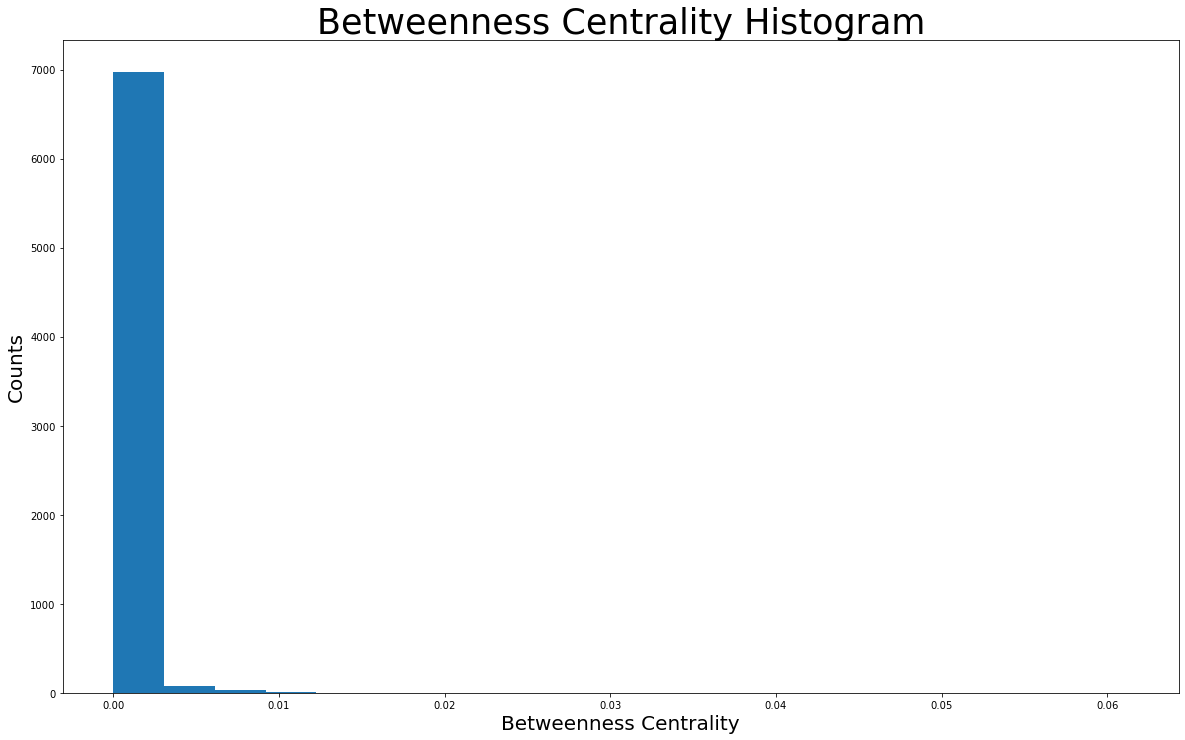

In [20]:
#Distribution of betweenness centralities
plt.figure(figsize=(20,12))
plt.hist(betweenness_centrality.values(), bins=20)
plt.title("Betweenness Centrality Histogram", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size":20})
plt.ylabel("Counts", fontdict={"size":20})

Majorly the whole network has betweenness centralities below 0.01, which indicates the network is sparse and mostly nodes do not act as bridges in shortest paths. 

(-1.1874808022379875,
 1.2078601667284965,
 -1.2026585519313813,
 1.2052991569042206)

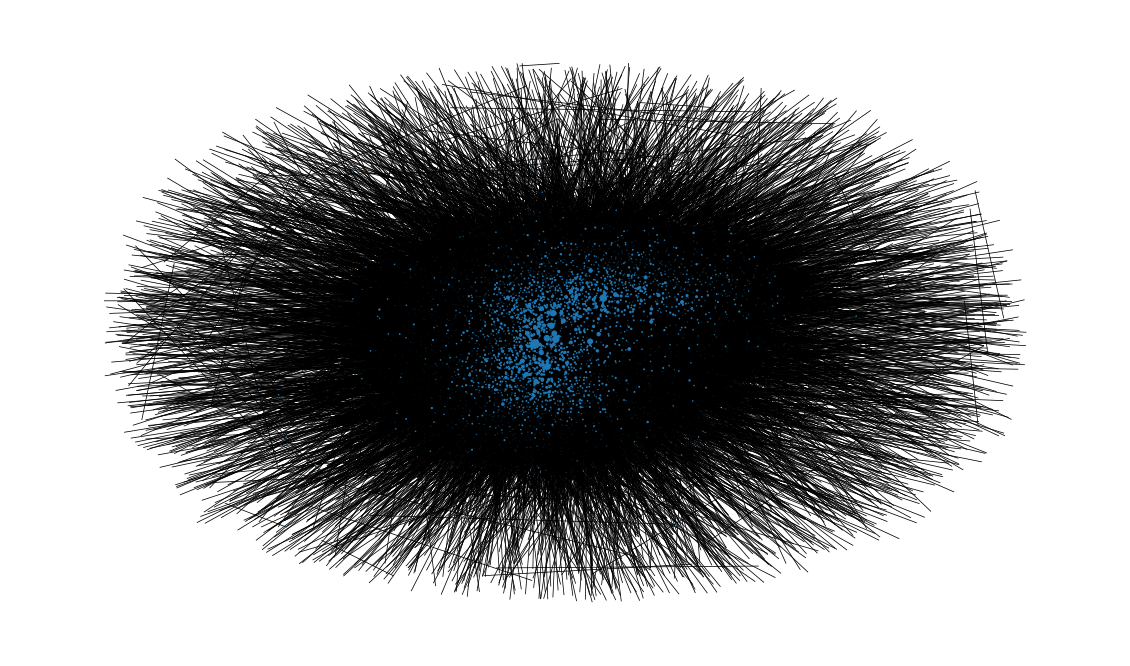

In [21]:
node_size = [v * 1200 for v in betweenness_centrality.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.15), node_size=node_size,
                 with_labels=False, width=0.75)
plt.axis("off")

### Closeness Centrality

In [22]:
#Top 10 nodes with highest closeness centralities
closeness_centrality = nx.centrality.closeness_centrality(G)
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(2565, 0.48741490125142045),
 (766, 0.46691538587304166),
 (457, 0.46660487487625174),
 (1549, 0.46586133082226927),
 (1166, 0.4656758149276032),
 (1374, 0.450140341535523),
 (11, 0.44881580653196423),
 (1151, 0.4440438898496422),
 (2688, 0.44183485538502504),
 (2485, 0.43450195092359406)]

These nodes have the highest closeness centrality and reside on the center of the network. These people are able to spread the most information easily as they are close to most of the nodes. 

In [23]:
#Average distance of a particular node to any other node
1/closeness_centrality[2565]

2.05164018874379

Text(0, 0.5, 'Counts')

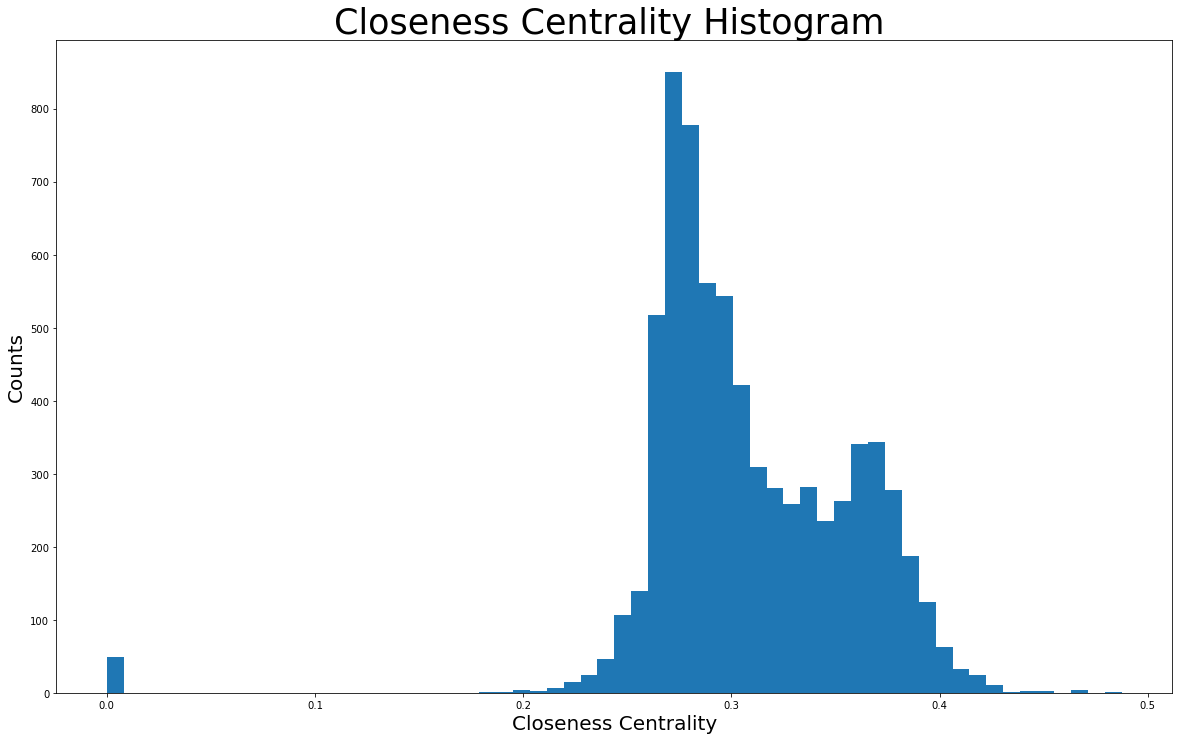

In [24]:
plt.figure(figsize=(20, 12))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

The closeness centralities is distributed between values from 0 to 0.5, but majority of the network has a closeness centrality ranging from 0.2 to 0.45. This indicates most nodes are close to the center of the network and also cloase to other nodes. 

(-1.2097662547230719,
 1.207540796101093,
 -1.172956666648388,
 1.1628066512942314)

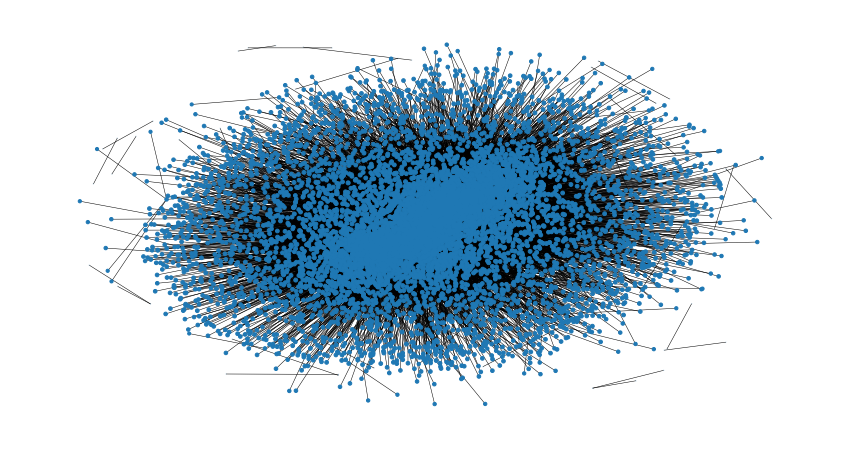

In [25]:
#Closeness centrality
node_size = [v * 50 for v in closeness_centrality.values()]
plt.figure(figsize=(15,8))
pos = nx.spring_layout(G, k=0.10)
nx.draw_networkx(G, pos=pos, node_size=node_size, 
                 with_labels=False, width=0.5)
plt.axis("off")

#### Eigenvector Centrality

In [26]:
#Top 10 nodes with highest eigenvector centrality
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(2565, 0.15768765457171688),
 (766, 0.13015062595000704),
 (1549, 0.12939877533535646),
 (1166, 0.11951074071570476),
 (2688, 0.11007091041009077),
 (457, 0.11000086685598998),
 (3352, 0.09178562117868855),
 (11, 0.08959234620313238),
 (1151, 0.0871942491779858),
 (1374, 0.08693972585814397)]

* Node 2565 has the highest eigenvector centrality. Having high degree, closeness and betweenness centrality makes this node the absolutely most important and influential node in the network. 
* Nodes 766, 1549, 1166, 2688 and 457 also have very high eigenvector centrality , and indicating their importance and influence in the network.

Text(0, 0.5, 'Counts')

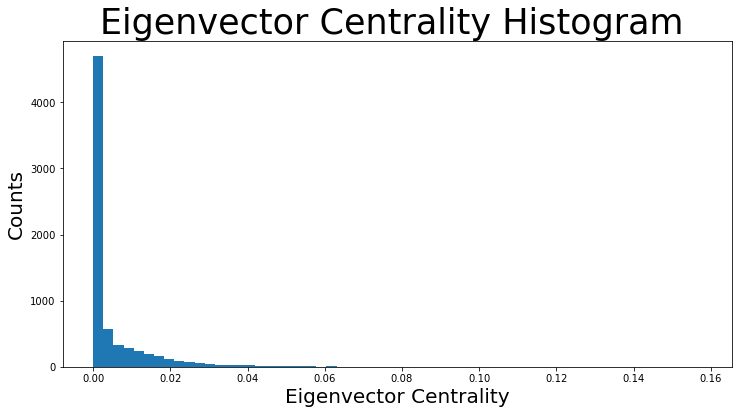

In [27]:
# Distribution of eigenvector centralities
plt.figure(figsize=(12, 6))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Majority of the nodes have an eigenvector centrality ranging from 0 to 0,04. Additionally there are nodes with higher eigenvector centralities as displayed as small bins in the histogram.

(-1.2040089514851569,
 1.2094306495785712,
 -1.1893217772245408,
 1.1550686568021775)

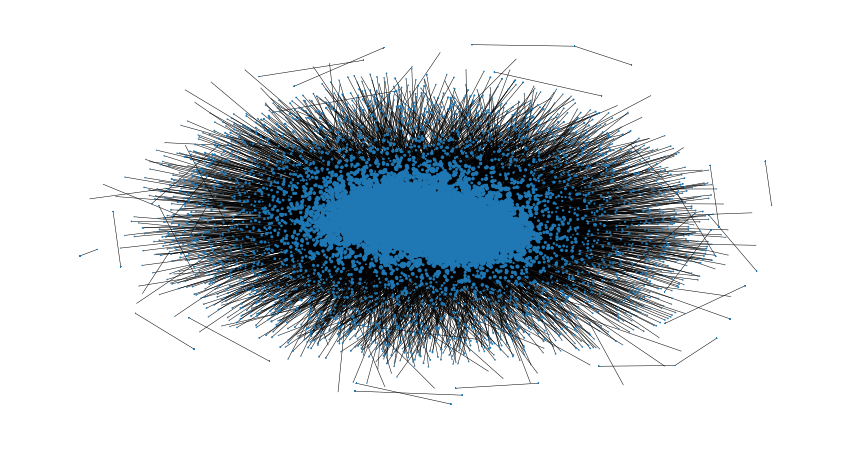

In [28]:
node_size = [v * 6000 for v in eigenvector_centrality.values()]
plt.figure(figsize=(15,8))
pos = nx.spring_layout(G, k=0.10)
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.50)
plt.axis("off")

### Clustering Effects

#### Assortavity 

In [29]:
nx.degree_assortativity_coefficient(G)

-0.0830524827001603

In [30]:
nx.average_clustering(G)

0.14089784589308738

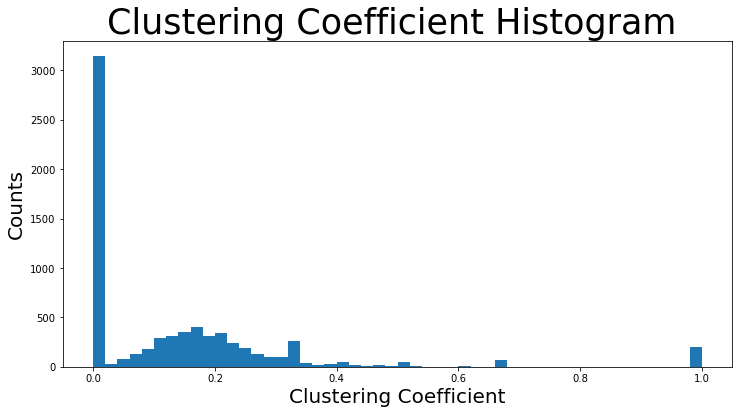

In [31]:
#Clustering coefficient distribution
plt.figure(figsize=(12, 6))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.savefig("cluster_coef.pdf")

Majority of the nodes have a clustering coefficient between 0 and 0.4. About 200 nodes have a clustering coefficient of 1.

In [32]:
#Unique triangles in the network
triangles_pn = list(nx.triangles(G).values())
sum(triangles_pn)/3

608389.0

In [33]:
#Average triangles each node is a part of
np.mean(triangles_pn)

256.52382290934645

In [34]:
#Median triangles each node is a part of
np.median(triangles_pn)

1.0

Such a huge difference in the mean and median triangles per node suggests that the majority of nodes in the network belong to extremely few triangles , while some nodes skew the average as they might be part of huge number of nodes while majority others have very less connections.

## Network Communities

In [35]:
GCC.number_of_nodes(),GCC.number_of_edges()

(7066, 100736)

#### Girvan-Newman Modularity Technique

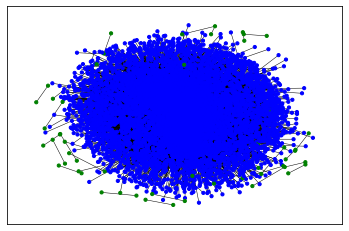

In [36]:
from networkx.algorithms.community.centrality import girvan_newman

#Identifying communities
communities = girvan_newman(G)

node_groups = []
for comm in next(communities):
    node_groups.append(list(comm))
    
color_map = [] #Coloring the different communities
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
# Drawing the communities
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.10), 
                 node_color=color_map, with_labels=False, node_size=10, width=0.5)
    

#### Louvain Method

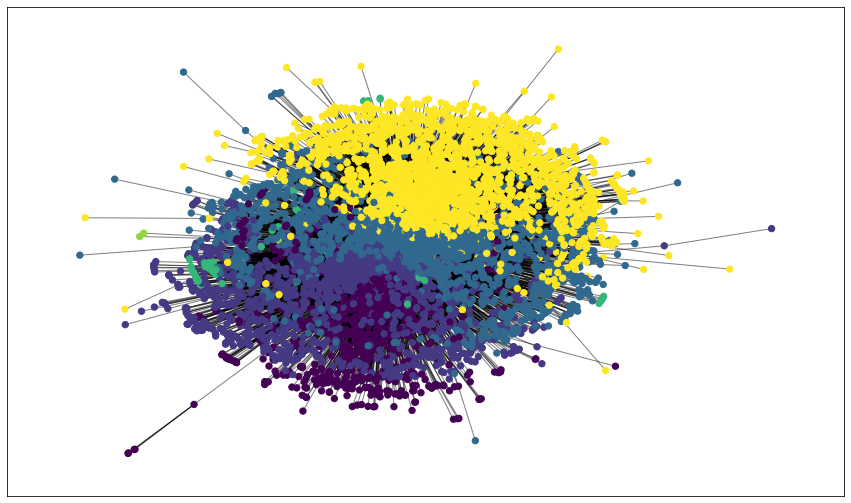

In [37]:
from community import community_louvain
partition = community_louvain.best_partition(GCC)
# draw the graph
pos = nx.spring_layout(GCC)
plt.figure(figsize=(15,9))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(GCC, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(GCC, pos, alpha=0.5)
plt.savefig("Cluster.pdf")

    